# Lineare Regression mit Fehlerrechnung

Wir stellen uns im Folgenden ein Kinderkarussel vor und wir wollen die Geschwindigkeit der Feuerwehrautos ermitteln. Das Auto selbst verfügt über kein Tachometer - es bleibt also eigentlich nur die Möglichkeit, die Zeit eines Umlaufs zu stoppen und aus der Geometrie des Karussells den zurückgelegten Weg zu bestimmen. Daraus lässt sich die Geschwindigkeit leicht berechnen.
Wie aber könnte eine Fehlerrechnung aussehen? Wie lässt sich eine Mehrfachmessung anstellen?

Beispielsweise könnte man die Zeit nach jedem Umlauf messen, die näherungsweise konstant sein sollte (bis auf die 1. Runde, wo noch beschleunigt wird). Es könnte sich also ein linearer Zusammenhang zwischen zurückgelegtem Weg und der benötigten Zeit vermuten:

$$y = m\cdot x + b \Rightarrow y - b - m\cdot x = 0$$

Die Konstanten $m$ und $b$ lassen sich nun bestimmen, indem *mindestens* zwei Messungen von $x$ und $y$ vorgenommen werden. Die Messungen dieser Größen werden fehlerbehaftet sein, sodass es zu einer Verfälschung der Konstanten kommt. Durch mehrere Messungen (>2!) von $x$ und $y$ kann der zufällige Fehler auf die Konstanten vermindert und abgeschätzt werden. Zur Vereinfachung nehmen wir allerdings an, dass $x$ fehlerfrei (oder zumindest fehlerarm) ist. Für verschiedene Werte von $x$ ergeben sich dann entsprechende $y$-Werte mit Unsicherheiten. 

Für unser Kinderkarussel bleibt der Messpunkt der Strecke, $x$, laut Annahme unverändert. Dieser ist also sehr genau. Eine Unsicherheit wird bei der Zeitmessung, $y = t$ auftreten. Folgende Messwerte wurden ermittelt:

* Weg  $x$ (m): 12, 24, 36, 42, 60, 72, 84, 96, 108, 120
* Zeit $t$ (s): 12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1

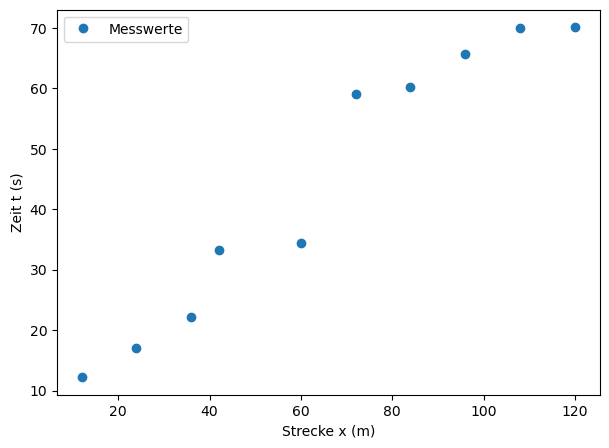

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(7,5)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

x = [12, 24, 36, 42, 60, 72, 84, 96, 108, 120] # Messwerte der Strecke x in m
t = [12.2, 17, 22.1, 33.2, 34.4, 59.1, 60.2, 65.7, 69.9, 70.1] # Messwerte der Zeit t in sek.
x = np.array(x) #konvertiere die Messwerte in ein Numpy-Array
t = np.array(t) #konvertiere die Messwerte in ein Numpy-Array

plt.plot(x,t, 'o', label = 'Messwerte')
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

## Analytische Lineare Regression <a id="SubSec-Analytical_LinReg"></a>

An dem Diagram erkennt man, dass die Parameter $m$ und $b$ niemals fehlerrfrei berechnet werden können. Die gemessenen Punkte werden immer neben der Geraden liegen. Das heißt eine fehlerfreie Berechnung der Parameter aus den Messwerten wird daher nicht möglich sein. Daher können wir wieder nur versuchen beste Schätzungen für $m$ und $b$ zu definieren, die bei einer steigenden Anzahl von Messwerten den *wahren* Werten beliebig nahe kommt. Diese Schätzwerte sind die Regressionskoeffizienten, welche wir bereits eben definiert hatten und wiefolgt berechnen können:

$$ m = \frac{S_{xt}}{S_{x}^2} = \frac{\overline{x\cdot t} - \overline x \cdot \overline t}{\overline{x^2} - (\overline x)^2}$$

$$b = \frac{\sum_{i=1}^N t_i - m \sum_{i=1}^N x_i}{N} = \bar t - m \cdot \bar x$$

Die Steigung ist 		 m = 0.6067 s/m
Der Ordinatenabschnitt ist 	 b = 4.7148 s


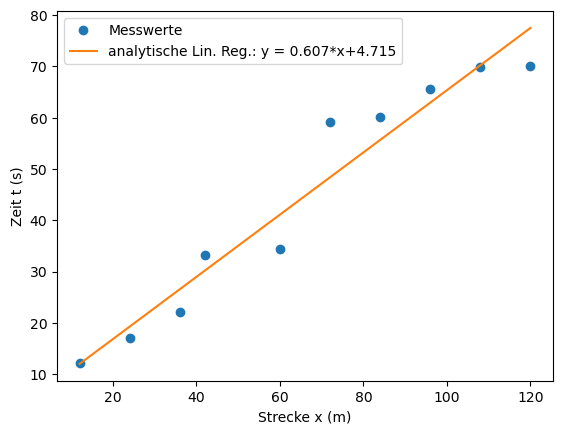

In [2]:
m = (np.mean(x*t) - np.mean(x)*np.mean(t))/(np.mean(x**2) - np.mean(x)**2)
b = np.mean(t) - m * np.mean(x)
print('Die Steigung ist \t\t m = %5.4f s/m' %(m))
print('Der Ordinatenabschnitt ist \t b = %5.4f s' %(b))

plt.plot(x,t, 'o', label = 'Messwerte') # plot Messwerte
plt.plot(x,m*x+b, label = 'analytische Lin. Reg.: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

## Lineare Regression mit Python: scipy <a id="SubSec-scipy_LinReg"></a>

Mit einem Datenanalyseprogramm, sei es hier in Python oder in Matlab oder Maple, können Hilfsfunktionen und Pakete geladen werden, um Fit-Funktionen automatisch auf Messwerte anzupassen. Dies ist in der Regel schneller und insbesondere auch für andere Zusammenhänge, neben linearen Zusammenhängen, viel einfacher in der Umsetzung. Man sollte jedoch stets das Ergebnis kontrollieren, z.B. anhand von grafischen Darstellungen, und sich die Unsicherheiten genau ansehen. Desweiteren können in der Fitroutine Startparameter angegeben werden, welche den Schätzwerten schon recht nah sein sollten. Das Fitergebnis kann nämlich unter Umständen sehr stark von der Wahl der Startparameter abhängen, gerade wenn es um komplexere Fitfunktionen geht. Im Folgenden wollen wir uns aber noch einmal das Beispiels das Karussels ansehen, um die beiden Methoden miteinander zu vergleichen. 

Als erstes definieren wir uns eine allgemein lineare Fitfunktion und anschließend nutzen wir das scipy-Paket und rufen die Optimierungsfunktion auf, um unsere Messwerte zu modellieren. Die Ausgangsparameter werden in einem weiteren Array abgespeichert, welches einerseits die gesuchten Variablen $m$ und $b$ beinhaltet, andererseits die Kovarianzmatrix enthält. Aus der Wurzel die Diagonalelemente dieser Kovarianzmatrix erhält man die Standardabweichung der bestimmten Variablen. 

Die scipy-Fitparameter lauten:
Die Steigung ist 		 m = (0.6067 +- 0.0534) s/m
Der Ordinatenabschnitt ist 	 b = (4.7148 +- 3.9581) s


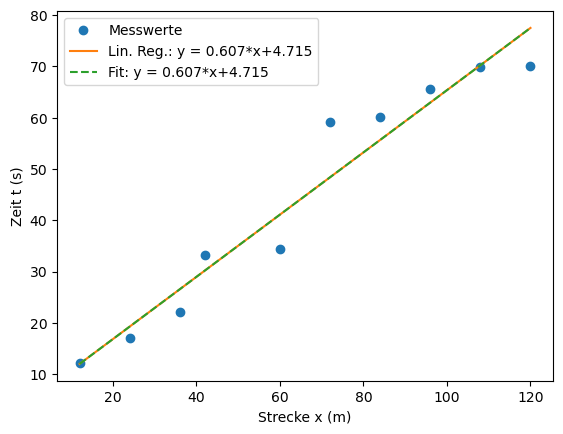

In [3]:
from scipy.optimize import curve_fit

def fit_lin(x, b, a): # Fit Funktion für eine Gerade mit Steigung b
    return b*x + a

# Fit der Daten:
fit_out = curve_fit(fit_lin, x, t)

print('Die scipy-Fitparameter lauten:')
print('Die Steigung ist \t\t m = (%5.4f +- %5.4f) s/m' %(fit_out[0][0], np.sqrt(fit_out[1][0][0])))
print('Der Ordinatenabschnitt ist \t b = (%5.4f +- %5.4f) s' %(fit_out[0][1], np.sqrt(fit_out[1][1][1])))

plt.plot(x,t, 'o', label = 'Messwerte') # plot Messwerte
plt.plot(x,m*x+b, label = 'Lin. Reg.: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.plot(x,fit_out[0][0]*x+fit_out[0][1], '--',label = 'Fit: y = %5.3f*x+%5.3f' %(fit_out[0][0],fit_out[0][1]))  # plot Fitfunktion mit b und a
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

Man erkennt, dass die Regressionskoeffizienten der beiden Methoden sehr gut übereinstimmen. Die Unterschiede betragen lediglich:

In [4]:
print('Unterschied in den Steigungen: \t\t  %5.3e' %(m-fit_out[0][0]))
print('Unterschied in den Ordinatenabschnitten: %5.3e' %(b-fit_out[0][1]))

Unterschied in den Steigungen: 		  8.582e-13
Unterschied in den Ordinatenabschnitten: -8.125e-12


## Lineare Regression mit Python: lmfit <a id="SubSec-lmfit_LinReg"></a>

Prinzipiell ist es wundervoll für Python für die Optimierung von Problemenen zu nutzen und das scipy-Paket bietet sehr robuste und einfach Nutzung. Andererseits unterscheidet sich das Verfahen nicht besonders von denjenigen, die wir in C oder Fortran bekommen würden. D.h. es gibt einige Herausforderungen in der praktischen Anwendung, warum scipy nicht die optimale Wahl ist:
* Der Benutzer muss sich die Reihenfolge der Variablen und deren Bedeutung merken. (Was war noch mal fit_out[0][0], die Steigung oder der Ordinatenabschnitt?)
* Wenn ich eine Variable nicht fitten möchte, also ich möchte zum Beispiel die Steigung auf fest Null setzen, so muss ich mir eine neue Funktion ohne diese Variable definieren. Insbesondere für komplexere Funktionen und Zusammenhänge wird dieses Verfahren schnell unübersichtlich. Einfacher wäre es, der Optimierungsfunktion zu sagen, welche Variablen ich in diesem Durchlauf gefittet haben möchte, und welche konstant bleiben sollen.
* Zwischen den verschiedenen Variablen können keine Beziehungen hergestellt werden. Es können lediglich Grenzen angegeben werden, in denen sich die Variablen befinden. 

Der Grund für die eingeschränkte Nutzung hat historische Gründe und basiert hauptsächlich auf Fit-Routinen, die beispielsweise für C oder Fortran entwickelt wurden. Python bietet aber mehr, da es unterschiedlich Objekte und Datenstrukturen bietet, statt nur mit Arrays zu rechnen. Daher möchten wir uns noch einem etwas besser geeignetem Paket widmen, und das eben vorgestellt Beispiel noch einmal durchrechnen. 

Das Paket lmfit definiert und benutzt Parameterobjekte anstelle von einfachen Zahlen als Variablen. Dies hat folgende Vorteile:
* Wir müssen uns endlich keine Reihenfolgen von Variablen mehr merken, wir können ihn ab sofort bedeutungsvolle Namen geben.
* Es müssen keine Arrays mehr für Grenzen eingegeben werden und die Reihenfolge der Grenzen, im Array, die vorher durch die Reihenfolge Variablen bestimmt war, spielt nun auch keine Rolle mehr.
* Wir können einfach Parameter fixieren ohne Zielfunktionen neu definieren zu müssen. 
* Algebraische Beschänkungen der Parameter sind ab sofort möglich.

Eine ausführliche Dokumentation findet man hier: https://lmfit.github.io/lmfit-py/index.html

lmfit hat eine eigene print-Ausgabe:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
abschnitt     4.715     -inf      inf    3.958     True     None     None
steigung     0.6067     -inf      inf  0.05342     True     None     None

Fit Report:
[[Model]]
    Model(f_lin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 10
    # variables        = 2
    chi-square         = 276.888038
    reduced chi-square = 34.6110047
    Akaike info crit   = 37.2102814
    Bayesian info crit = 37.8154516
[[Variables]]
    steigung:   0.60665381 +/- 0.05342018 (8.81%) (init = 0.7)
    abschnitt:  4.71484116 +/- 3.95814322 (83.95%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(steigung, abschnitt) = -0.883


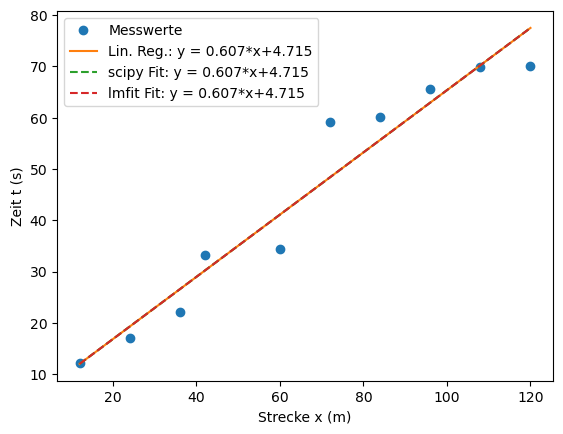

In [5]:
from lmfit import minimize, Parameters
from lmfit import Model

def f_lin(x, steigung, abschnitt):
    return steigung*x + abschnitt

model = Model(f_lin)
params = model.make_params(steigung=0.7, abschnitt=10.0)
result = model.fit(t, params, x=x)

print('lmfit hat eine eigene print-Ausgabe:')
result.params.pretty_print()

print()
print('Fit Report:')
print(result.fit_report())

plt.plot(x,t, 'o', label = 'Messwerte') # plot Messwerte
plt.plot(x,m*x+b, label = 'Lin. Reg.: y = %5.3f*x+%5.3f' %(m,b))  # plot Ausgleichsgerade mit m und b
plt.plot(x,fit_out[0][0]*x+fit_out[0][1], '--',label = 'scipy Fit: y = %5.3f*x+%5.3f' %(fit_out[0][0],fit_out[0][1]))  # plot Fitfunktion mit b und a
plt.plot(x,result.best_fit, '--',label = 'lmfit Fit: y = %5.3f*x+%5.3f' %(result.params['steigung'].value,result.params['abschnitt'].value))  # plot Fitfunktion mit b und a
plt.xlabel('Strecke x (m)')
plt.ylabel('Zeit t (s)')
plt.legend()
plt.show()

Anhand der ausführlichen Ausgabe erkennt man sofort, wie viele Informationen man aus der Benutzung dieses Paketes ziehen kann, ohne aufwendige Fehlerfortpflanzung betreiben zu müssen. Außerdem kann man Beispielsweise die Fit-Methode ändern (anstelle von least-squares), man kann sich die Anfangs-Fitfunktion ansehen (und parallel zur 'besten' Fit-Funktion anzeigen lassen), man kann Parameter konstant setzen oder sich Standardfehler, $\chi^2$ und Korrelationen (zwischen den Fit-Parametern, nicht den Messwerten!) ausgeben lassen. 

## Bestimmung der Geschwindigkeit <a id="SubSec-geschwindigkeit"></a>

Eigentlich wollten wir ja die Geschwindigkeit der Feuerwehrautos bestimmen.
Der Kehrwert der Steigung $m$ liefert uns die Geschwindigkeit des Karussells, wenn wir den Kehrwert berechnen:

In [6]:
v = 1/m
v_fit = 1/fit_out[0][0]
print('Die Geschwindigkeit ermittelt mittels Analytik ist: v = %5.4f m/s = %5.4f km/h' %(v, v/1000*3600))
print('Die Geschwindigkeit ermittelt mittels Fit ist:      v = %5.4f m/s = %5.4f km/h' %(v_fit, v_fit/1000*3600))

Die Geschwindigkeit ermittelt mittels Analytik ist: v = 1.6484 m/s = 5.9342 km/h
Die Geschwindigkeit ermittelt mittels Fit ist:      v = 1.6484 m/s = 5.9342 km/h


### Unsicherheit der Geschwindigkeit <a id="SubSec-u_geschwindigkeit"></a>

Wie bereits oben schon erwähnt, hat die Regressionen eine Abweichung. Daher müssen wir uns jetzt fragen, was der Fehler der Geschwindigkeit ist. Diesen bekommen wir aus der Steigiung $m$. Das heißt wir benötigen zuerst den Fehler von $m$: 

$$s_m = s_t \cdot \sqrt{\frac{1}{N\cdot (\overline{x^2} - (\overline x)^2)}} \quad \textrm{mit} \quad s_t = \sqrt{\frac{1}{N-2}\sum(t_i - mx_i - b)^2 }$$

Der Vollständigkeit halber berechnen wir ebenfalls den Fehler für $b$:

$$s_b  = s_m \cdot \sqrt{\overline{x^2}}$$

In [7]:
N = len(t)
diff_t = 0
for i in range(N):
    diff_t += ( t[i] - m * x[i] - b )**2

streuung_t = 1/(N-2)*diff_t
s_t = np.sqrt(streuung_t)
s_m = s_t * np.sqrt(1 / (N*(np.mean(x**2) - np.mean(x)**2)))
s_b = s_m * np.sqrt(np.mean(x**2))

print('Die Unsicherheit von t ist \t s_t = %5.4f s' %(s_t))
print('Die Unsicherheit von m ist \t s_m = %5.4f s/m' %(s_m))
print('Die Unsicherheit von b ist \t s_b = %5.4f s' %(s_b))

Die Unsicherheit von t ist 	 s_t = 5.8831 s
Die Unsicherheit von m ist 	 s_m = 0.0534 s/m
Die Unsicherheit von b ist 	 s_b = 3.9581 s


Die Fitroutine in Python gibt uns ebenfalls Unsicherheiten in Form von der Kovarianz-Matrix aus. Auf der Diagonale stehen die Varianzen, $s^2$, auf den Nicht-Diagonalelementen stehen die Kovarianzen (Korrelationsterme zwischen $m$ und $b$):

$$\mathrm{cov}(m,b) = 
\begin{pmatrix}
 s_m^2 & s_{mb} \\
 s_{bm} & s_b^2
\end{pmatrix} $$

Die Unsicherheiten für $m$ und $b$ erhalten wir also aus der Wurzel von den Diagonalelementen. 

In [8]:
print('Die Kovarianzmatrix hat die folgende Form: \n', fit_out[1])
print('')
print('Die Unsicherheit von m ist \t s_m = %5.4f s/m' %(np.sqrt(fit_out[1][0][0])))
print('Die Unsicherheit von b ist \t s_b = %5.4f s' %(np.sqrt(fit_out[1][1][1])))

Die Kovarianzmatrix hat die folgende Form: 
 [[ 2.85371544e-03 -1.86632993e-01]
 [-1.86632993e-01  1.56668987e+01]]

Die Unsicherheit von m ist 	 s_m = 0.0534 s/m
Die Unsicherheit von b ist 	 s_b = 3.9581 s


Auch die Unsicherheiten stimmen für beide Methoden perfekt überein.

Nun interessiert uns allerdings der absolute Fehler der geschätzen Geschwindigkeit. Da die Geschwindigkeit der Kehrwert der Steigung ist ($v = \frac{1}{m}$), müssen wir Fehlerfortpflanzung anwenden. Der Fehler wirkt sich wiefolgt auf den Kehrwert aus: 

$$\Delta v = \left|\frac{\partial v}{\partial m}\right|\cdot \Delta m = \left| -\frac{1}{m^2} \right| \cdot s_m = \frac{1}{m^2} \cdot s_m = s_v$$

Da beide Methoden die gleichen Werte für Schätzungen und Unsicherheiten ausgeben, ersparen wir uns ab nun die Berechnung der Geschwindigkeit inkl. Unsicherheit für beide Methoden. Die Fehlerrechnung wird nur noch für die analytische Methode ausgeführt:

In [9]:
s_v = 1/m**2 * s_m
print('Die Unsicherheit von v ist \t s_v = %5.4f m/s' %(s_v))

Die Unsicherheit von v ist 	 s_v = 0.1452 m/s


Das Messergebnis kann also wiefolgt angegeben werden:
    
$$v = (1,6484 \pm 0,1452)\,\mathrm{m/s}$$    

**Ist diese Angabe sinnvoll?** Wenn wir das so konkret fragen, dann vermutlich nicht...
Wenn der Fehler bereits in der ersten Stelle nach dem Komma signifikant bemerkbar den Schätzwert beeinflusst, warum sollte man sich dann die Mühe machen noch weitere Nachkommastellen hinzuschreiben? Also **sinnvoll runden**:

$$v = (1,6 \pm 0,2)\,\mathrm{m/s}$$    

Warum 0,2 und nicht 0,1? **Fehler werden immer aufgerundet!**

Nun könnte noch der relative Fehler $\Delta v/v$ berechnet werden.

In [10]:
print('Die relative Unsicherheit von v ist \t s_v = %5.4f Prozent' %(s_v/v*100))

Die relative Unsicherheit von v ist 	 s_v = 8.8057 Prozent


### Korrelationskoeffizient <a id="SubSec-Korrelationskoeffizient"></a>

Der Korrelationskoeffizient kann wiefolgt berechnet werden:
    
$$r = \frac{\overline{x\cdot t} - \overline x \cdot \overline t}{\sqrt{\overline{x^2} - (\overline x)^2} \cdot {\sqrt{\overline{t^2} - (\overline t)^2}}} $$    

In [11]:
# Analytische Methode:
r = (np.mean(x*t)-np.mean(x)*np.mean(t))/(np.sqrt(np.mean(x**2) - np.mean(x)**2) * np.sqrt(np.mean(t**2) - np.mean(t)**2))
print('Der Korrelationskoeffizient zwischen x und t beträgt: %5.8f\n'%(r))

# Python:
r = np.corrcoef(x, t)
print('Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:')
print(r)

Der Korrelationskoeffizient zwischen x und t beträgt: 0.97035603

Die Korrelationsmatrix zwischen x und t mittels numpy-Paket lautet:
[[1.         0.97035603]
 [0.97035603 1.        ]]


Der Korrelationskoeffizient von $+ 0,97035$ zeigt mit positivem Vorzeichen eine direkte Proportionalität zwischen $x$ und $t$. Die geringfügige Abweichung zu +1 zeigt, dass die Messwerte leicht von dem erwarteten linearen Zusammenhang dennoch abweichen.